## CDCV and MGC-TS on fMRI Data

The demo below shows the cross-distance covariance (CDCV) test and multiscale graph correlation time series (MGC-TS) test for independence of time series on fMRI data.

In [16]:
# Import dependencies.
import numpy as np
import nibabel.cifti2 as ci
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import math

from mgcpy.independence_tests.cdcv import CDCV
from mgcpy.independence_tests.mgc_ts import MGC_TS

In [2]:
# Load image - individual 100307.
img = ci.load("rfMRI_REST1_LR_Atlas_hp2000_clean_filt_sm6.HCPMMP.ptseries.nii")
fmri_data = np.array(img.get_fdata())

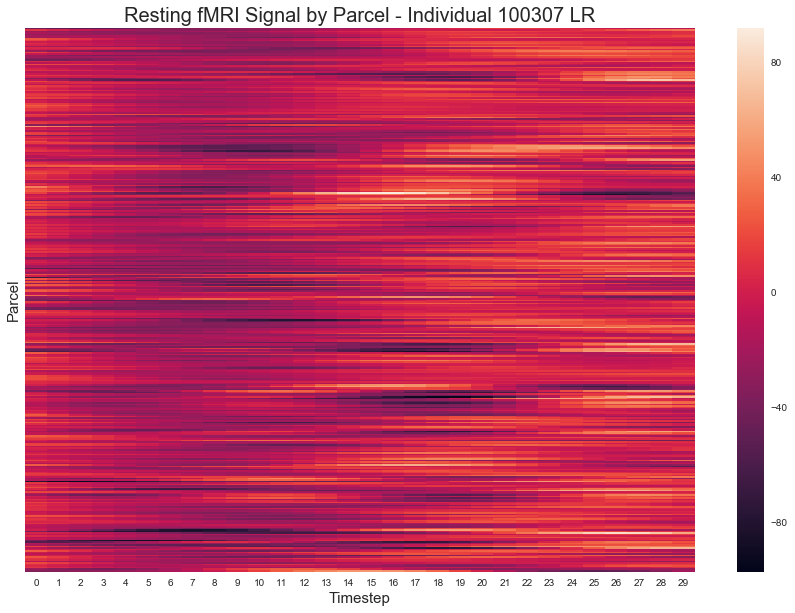

In [3]:
# Visualize data, i.e. inspect the first 30 timesteps of each parcel.

# Generate heatmap.
timesteps = 30
displayed_data = np.transpose(fmri_data[range(timesteps),:])
plt.subplots(figsize=(15,10))
ax = sns.heatmap(displayed_data, yticklabels=False)

# Plot parameters.
plt.title('Resting fMRI Signal by Parcel - Individual 100307 LR', fontsize = 20)
plt.ylabel('Parcel', fontsize = 15)
plt.xlabel('Timestep', fontsize = 15)
plt.show()

**We now inspect the dependence between parcels using CDCV and MGC-TS.**

In [18]:
# Parameters and constants.
sample_indices = range(600) # Which timesteps to consider.
n = len(sample_indices)
p = fmri_data.shape[1] # Number of parcels.
num_bootstrap = 500 # Number of permutations to estimate p-value.
verbose = True # Print output to track progress.
M = 0 # Number of lags in the past to inspect.

In [19]:
# Cross-distance covariance: computation.

cdcv = CDCV(max_lag = M)
cdcv_stat_matrix = np.zeros(p*p).reshape(p, p)
cdcv_pval_matrix = np.zeros(p*p).reshape(p, p)

for i in range(p):
    if verbose and not i % math.floor(p / 10):
        print("Estimating dependence within and between of parcel ", str(i))
    
    # Diagonal entries - measure dependence of parcel with itself (for calibration).
    X = fmri_data[sample_indices,i].reshape(n, 1)
    cdcv_statistic, _ = cdcv.test_statistic(X, X)
    cdcv_stat_matrix[i,i] = cdcv_statistic
    # cdcv_p_value, _ = cdcv.p_value(X, X, replication_factor = num_bootstrap)
    # cdcv_pval_matrix[i,i] = cdcv_p_value
    
    # Off-diagonal entries - measure dependence between parcels.
    for j in range(i):
        X = fmri_data[sample_indices,i].reshape(n, 1)
        Y = fmri_data[sample_indices,j].reshape(n, 1)
        
        cdcv_statistic, _ = cdcv.test_statistic(X, Y)
        cdcv_stat_matrix[i,j] = cdcv_statistic
        cdcv_stat_matrix[j,i] = cdcv_statistic
        # cdcv_p_value, _ = cdcv.p_value(X, Y, replication_factor = num_bootstrap)
        # cdcv_pval_matrix[i,j] = cdcv_p_value
        # cdcv_pval_matrix[j,i] = cdcv_p_value

# Be sure to check the file name to which you want to write!
np.savetxt("cdcv_stat_matrix_600.csv", cdcv_stat_matrix, delimiter=",")
# np.savetxt("cdcv_pval_matrix.csv", cdcv_pval_matrix, delimiter=",")

Estimating dependence within and between of parcel  0
Estimating dependence within and between of parcel  36
Estimating dependence within and between of parcel  72
Estimating dependence within and between of parcel  108
Estimating dependence within and between of parcel  144
Estimating dependence within and between of parcel  180
Estimating dependence within and between of parcel  216
Estimating dependence within and between of parcel  252
Estimating dependence within and between of parcel  288
Estimating dependence within and between of parcel  324


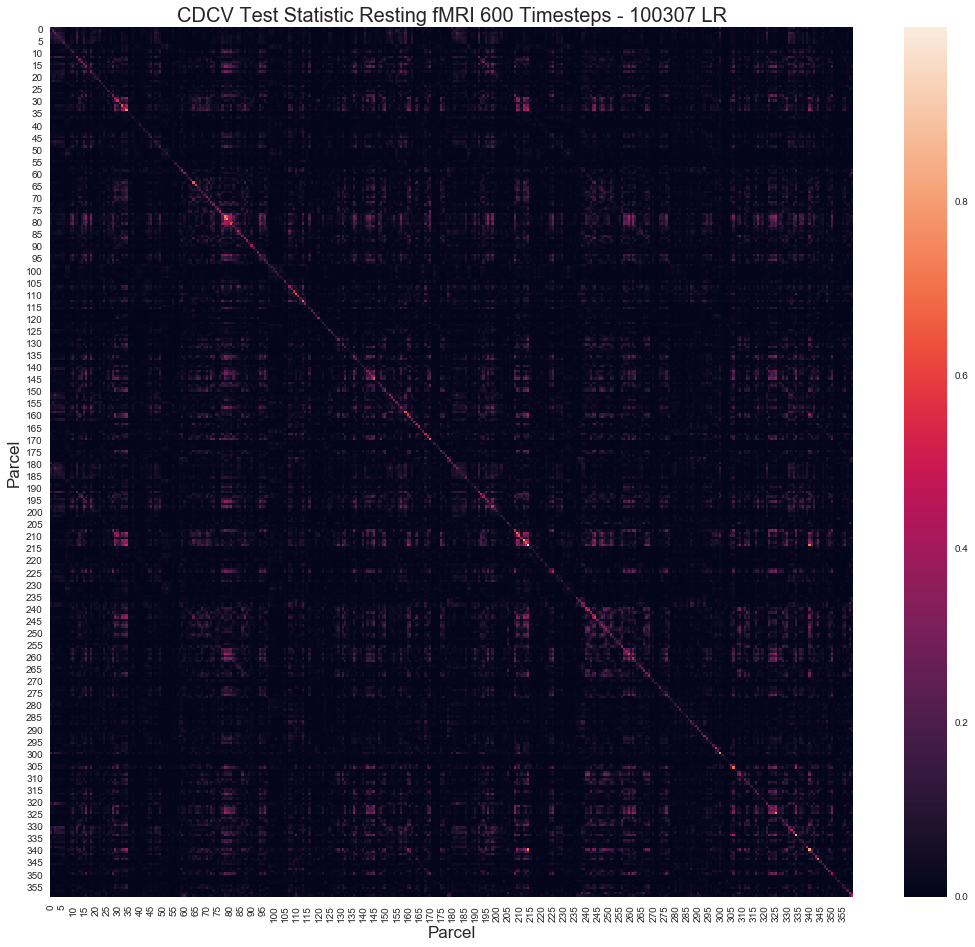

In [20]:
# Cross-distance covariance: visualization.

# TO DO: Use labels organizing parcels into regions, and visualize heatmap of p-values and test_statistics.

# Be sure to check the file name from which you want to read!
cdcv_stat_matrix_600 = np.genfromtxt("cdcv_stat_matrix_600.csv", delimiter=',')
spread = cdcv_stat_matrix_300.max() - cdcv_stat_matrix_300.min()
cdcv_stat_matrix_600 = cdcv_stat_matrix_300 / spread
plt.subplots(figsize=(18,16))
ax = sns.heatmap(cdcv_stat_matrix_300)

# Plot parameters.
plt.title('CDCV Test Statistic Resting fMRI 600 Timesteps - 100307 LR', fontsize = 20)
plt.ylabel('Parcel', fontsize = 17)
plt.xlabel('Parcel', fontsize = 17)
plt.show()

# TO DO: Repeat for p-values.

In [ ]:
# MGC time series: computation.

mgc_ts = MGC_TS(max_lag = M)
mgc_ts_stat_matrix = np.zeros(p*p).reshape(p, p)
mgc_ts_pval_matrix = np.zeros(p*p).reshape(p, p)

for i in range(p):
    if verbose and not i % math.floor(p / 10):
        print("Estimating dependence within and between of parcel ", str(i))
        
    # Diagonal entries - measure dependence of parcel with itself (for calibration).
    mgc_ts_statistic, _ = mgc_ts.test_statistic(fmri_data[:,i].reshape(n, 1), fmri_data[:,i].reshape(n, 1))
    mgc_ts_stat_matrix[i,i] = mgc_ts_statistic
    # cdcv_p_value, _ = cdcv.p_value(X, X, replication_factor = num_bootstrap)
    # cdcv_pval_matrix[i,i] = cdcv_p_value
    
    # Off-diagonal entries - measure dependence between parcels.
    for j in range(i):
        X = fmri_data[:,i].reshape(n, 1)
        Y = fmri_data[:,j].reshape(n, 1)
        
        mgc_ts_statistic, _ = mgc_ts.test_statistic(X, Y)
        mgc_ts_stat_matrix[i,j] = mgc_ts_statistic
        mgc_ts_stat_matrix[j,i] = mgc_ts_statistic
        # mgc_ts_p_value, _ = mgc_ts.p_value(X, Y, replication_factor = num_bootstrap)
        # mgc_ts_pval_matrix[i,j] = mgc_ts_p_value
        # mgc_ts_pval_matrix[j,i] = mgc_ts_p_value

# Be sure to check the file name to which you want to write!
np.savetxt("mgc_ts_stat_matrix.csv", mgc_ts_stat_matrix, delimiter=",")
# np.savetxt("mgc_ts_pval_matrix.csv", mgc_ts_pval_matrix, delimiter=",")

In [ ]:
# MGC time series: computation.

# TO DO: Use labels organizing parcels into regions, and visualize heatmap of p-values and test_statistics.